# Analysis

In [421]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

In [435]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

# Data Preprocessing

In [436]:
pd.options.display.max_rows=None

In [437]:
data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [438]:
def extract_cabin(cabin):
    if cabin == cabin:
        return cabin.split()[0][0]
    else:
        return cabin
    
    

In [439]:
data['Cabin_Codes'] = data['Cabin'].apply(extract_cabin)

In [440]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


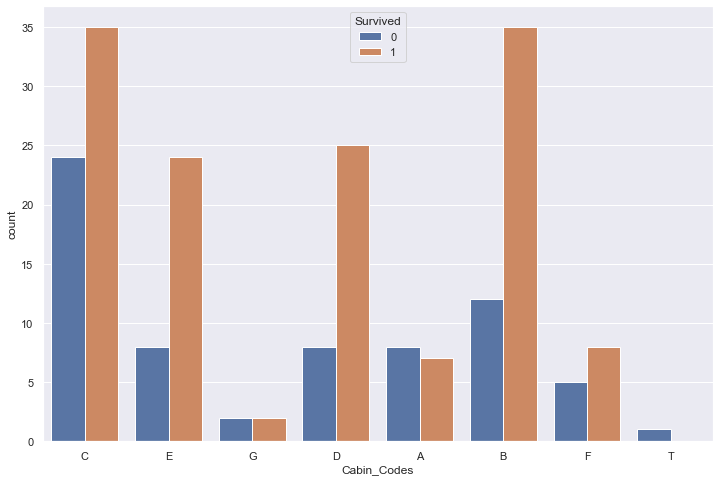

In [441]:
sns.countplot(x='Cabin_Codes',data=data,hue='Survived')

In [564]:
def process_cabin(data,fornull=True):
    if fornull:
        cabin_data = data[(data['Cabin'].isnull())]
    else:
        cabin_data = data[~(data['Cabin'].isnull())]
    y = cabin_data['Cabin_Codes']
    x = cabin_data[['Age','SibSp','Parch','Fare','Pclass','Sex','Embarked']]
    x.Age = x.apply(transform_age,axis=1)
    x = pd.get_dummies(x,columns=['Pclass','Sex','Embarked'],drop_first=True)
    return x,y,cabin_data

In [565]:
x,y,cabin_data = process_cabin(data,fornull=False)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [566]:
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
1,38.0,1,0,71.2833,0,0,0,0,0
3,35.0,1,0,53.1000,0,0,0,0,1
6,54.0,0,0,51.8625,0,0,1,0,1
10,4.0,1,1,16.7000,0,1,0,0,1
11,58.0,0,0,26.5500,0,0,0,0,1


In [567]:
from sklearn.neighbors import KNeighborsClassifier


In [568]:
kmodel = KNeighborsClassifier(n_neighbors=2)
kres = kmodel.fit(x,y)
cabin_data['Predicted'] = kres.predict(x)
acc = (cabin_data[cabin_data.Cabin_Codes == cabin_data.Predicted].count()/cabin_data.shape[0])[0]
print('Accuracy for {} : {}'.format(2,acc))


Accuracy for 2 : 0.6862745098039216


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [569]:
test_data,test_target,cabin_data = process_cabin(data)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [570]:
cabin_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,E
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q,F
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,F


In [571]:
cabin_data['Cabin_Codes'] = kres.predict(test_data)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [572]:
data['Cabin_Codes'] = data['Cabin_Codes'].fillna(cabin_data['Cabin_Codes'])

In [573]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,F
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,E


## Finding Age Using Linear Regression

In [574]:
import math

In [575]:
def transform_age(dataset):
    if not math.isnan(dataset.Age):
        return dataset.Age
    if dataset.Pclass == 1:
        if dataset.Sex == 'male':
            return 40
        else:
            return 35
    elif dataset.Pclass == 2:
        if dataset.Sex == 'male':
            return 30
        else:
            return 28
    else:
        if dataset.Sex == 'male':
            return 24
        else:
            return 22
            
    

In [576]:
data.Age = data.apply(transform_age,axis=1)

In [577]:


col_to_include = ['Survived','Pclass', 'Sex', 'Age', 'SibSp',  'Embarked','Parch','Fare','Cabin_Codes']
#col_to_include = ['Survived','Pclass', 'Sex', 'Age', 'SibSp']
dataset = data.copy()

dataset = dataset[col_to_include]

#dataset = dataset.dropna(subset=['Embarked'])

In [578]:
'''
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(fill_value=np.nan,strategy='mean',verbose=1)

imputer.fit(np.reshape(dataset['Age'].values,(-1,1)))

dataset['Age'] = imputer.transform(np.reshape(dataset['Age'].values,(-1,1)))
'''

"\nfrom sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(fill_value=np.nan,strategy='mean',verbose=1)\n\nimputer.fit(np.reshape(dataset['Age'].values,(-1,1)))\n\ndataset['Age'] = imputer.transform(np.reshape(dataset['Age'].values,(-1,1)))\n"

## Train And test Dataset

In [579]:
y = dataset['Survived']

x = dataset.drop(['Survived'],axis=1)

In [580]:
x.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', 'Parch', 'Fare',
       'Cabin_Codes'], dtype=object)

In [581]:
x = pd.get_dummies(x,columns=['Pclass','Sex','Embarked','Cabin_Codes'],drop_first=True)

x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G,Cabin_Codes_T
0,22.0,1,0,7.2500,0,1,1,0,1,0,0,0,0,1,0,0
1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,0,0,0,0,1,0,0
3,35.0,1,0,53.1000,0,0,0,0,1,0,1,0,0,0,0,0
4,35.0,0,0,8.0500,0,1,1,0,1,0,0,0,1,0,0,0


In [582]:
from sklearn.model_selection import train_test_split

In [583]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =32,shuffle=True)

x_train.shape,x_test.shape

x_train = sm.add_constant(x_train)

x_test = sm.add_constant(x_test)

print('Test Shape : {} , Train Shape {}'.format(x_test.shape,x_train.shape))

Test Shape : (179, 17) , Train Shape (712, 17)


# Modelling

In [584]:
model = sm.Logit(y_train,x_train)

res = model.fit()

res.summary()

         Current function value: 0.426387
         Iterations: 35


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                           16
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.3582
Time:                        20:26:54   Log-Likelihood:                -303.59
converged:                      False   LL-Null:                       -473.03
Covariance Type:            nonrobust   LLR p-value:                 2.145e-62
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.7510      0.684      5.487      0.000       2.411       5.091
Age              -0.0467      0.010     -4.658      0.000      -0.066      -0.027
SibSp            -0.3971      0.131     -3.043      0.002      -0.653      -0.141
Parch            -0.0646      0.147     -0.440      0.660      -0.352       0.223
Fare              0.0021      0.003      0.627      0.531      -0.005       0.009
Pclass_2         -1.1264      0.370     -3.041      0.002      -1.852      -0.400
Pclass_3         -2.4805      0.408     -6.082      0.000      -3.280      -1.681
Sex_male         -2.6520      0.233    -11.361      0.000      -3.110      -2.194
Embarked_Q       -0.2353      0.445     -0.529      0.597      -1.108       0.637
Embarked_S       -0.6377      0.273     -2.333      0.020      -1.173      -0.102
Cabin_Codes_B     0.9416      0.542      1.737      0.082      -0.121       2.004
Cabin_Codes_C     0.9844      0.523      1.882      0.060      -0.041       2.009
Cabin_Codes_D     0.6462      0.532      1.214      0.225      -0.397       1.689
Cabin_Codes_E     1.5270      0.530      2.879      0.004       0.487       2.567
Cabin_Codes_F     0.7772      0.557      1.395      0.163      -0.315       1.869
Cabin_Codes_G     1.9324      1.274      1.517      0.129      -0.564       4.429
Cabin_Codes_T   -16.5174   8444.422     -0.002      0.998   -1.66e+04    1.65e+04
=================================================================================
"""

In [585]:
confusion_matrix(x_train,y_train,res)

(array([[394.,  47.],
        [ 73., 198.]]),
 0.8314606741573034)

In [586]:
print('Train Accuracy :',(res.pred_table()[0][0] + res.pred_table()[1][1])/np.sum(res.pred_table())*100)

Train Accuracy : 83.14606741573034


In [587]:
print('Test Metrics',confusion_matrix(x_test,y_test,res))

Test Metrics (array([[93., 15.],
       [21., 50.]]), 0.7988826815642458)


## Create Submission

In [600]:
def correct_values(pred_values):
    if pred_values > 0.5:
        return 1
    else:
        return 0

In [613]:
t_data = pd.read_csv('test.csv')
test_data = t_data.copy()

In [614]:
#test_data = test_data.dropna(subset=['Embarked'])

In [615]:
test_data.Age = test_data.apply(transform_age,axis=1)

In [616]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [617]:
test_data['Fare'] = test_data['Fare'].fillna(method='ffill')

In [618]:
test_data['Cabin_Codes'] = test_data['Cabin'].apply(extract_cabin)

In [619]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [620]:
passenger_id = test_data.PassengerId

In [621]:
final_data,temp1,temp2 = process_cabin(test_data,fornull=True)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [622]:
final_data.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [631]:
temp2['Codes'] = kres.predict(final_data)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [634]:
test_data['Cabin_Codes'] = test_data['Cabin_Codes'].fillna(temp2['Codes'])

In [635]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,E
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,B
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,C
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,E
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,D


In [636]:
col_to_include = col_to_include[1:]

In [637]:
test_data = test_data[col_to_include]

In [638]:
test_data = pd.get_dummies(test_data,columns=['Pclass','Sex','Embarked','Cabin_Codes'],drop_first=True)
test_data = sm.add_constant(test_data)
test_data.head()

,const,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G
0,1.0,34.5,0,0,7.8292,0,1,1,1,0,0,0,0,1,0,0
1,1.0,47.0,1,0,7.0000,0,1,0,0,1,1,0,0,0,0,0
2,1.0,62.0,0,0,9.6875,1,0,1,1,0,0,1,0,0,0,0
3,1.0,27.0,0,0,8.6625,0,1,1,0,1,0,0,0,1,0,0
4,1.0,22.0,1,1,12.2875,0,1,0,0,1,0,0,1,0,0,0


In [657]:
model = sm.Logit(y,sm.add_constant(x))

In [658]:
res = model.fit()

         Current function value: 0.428885
         Iterations: 35


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [659]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      874
Method:                           MLE   Df Model:                           16
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.3559
Time:                        20:34:52   Log-Likelihood:                -382.14
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.342e-80
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8331      0.610      6.280      0.000       2.637       5.029
Age              -0.0444      0.009     -4.937      0.000      -0.062      -0.027
SibSp            -0.3288      0.113     -2.922      0.003      -0.549      -0.108
Parch            -0.0439      0.127     -0.347      0.729      -0.292       0.204
Fare              0.0014      0.003      0.539      0.590      -0.004       0.006
Pclass_2         -1.2813      0.323     -3.971      0.000      -1.914      -0.649
Pclass_3         -2.6264      0.351     -7.481      0.000      -3.315      -1.938
Sex_male         -2.7361      0.208    -13.143      0.000      -3.144      -2.328
Embarked_Q       -0.0830      0.393     -0.211      0.833      -0.853       0.687
Embarked_S       -0.4815      0.248     -1.945      0.052      -0.967       0.004
Cabin_Codes_B     0.7666      0.478      1.603      0.109      -0.171       1.704
Cabin_Codes_C     0.6290      0.460      1.367      0.172      -0.273       1.531
Cabin_Codes_D     0.5784      0.465      1.244      0.213      -0.333       1.489
Cabin_Codes_E     1.4778      0.464      3.183      0.001       0.568       2.388
Cabin_Codes_F     0.7297      0.493      1.482      0.138      -0.236       1.695
Cabin_Codes_G     0.8772      1.037      0.846      0.398      -1.156       2.910
Cabin_Codes_T   -20.1513   4.63e+04     -0.000      1.000   -9.08e+04    9.08e+04
=================================================================================
"""

In [660]:
confusion_matrix(sm.add_constant(x),y,res)

(array([[484.,  65.],
        [ 96., 246.]]),
 0.819304152637486)

In [670]:
test_data['Cabin_Codes_T'] = 0

In [671]:
pred_values = res.predict(test_data)
pred_values = pred_values.apply(correct_values)

In [672]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived':pred_values.values.astype(int)
                        })
result = result.sort_values(by='PassengerId')

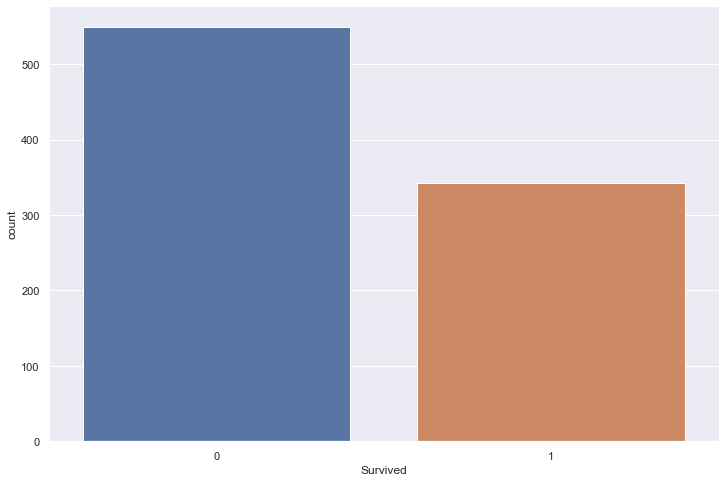

In [675]:
sns.countplot(data['Survived'])

In [674]:
result.shape

(418, 2)

In [676]:
result.to_csv('Prediction_5.csv',index=False)